<a href="https://colab.research.google.com/github/microprediction/optimizer-notebooks/blob/main/ultraopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultraopt
!pip install humpday

In [ ]:
from ultraopt import fmin
from humpday.objectives.classic import shekel_on_cube


In [5]:
def ultraopt_cube(objective,n_trials,n_dim,with_count):
    
    global feval_count
    feval_count = 0

    HDL = dict([ ('u'+str(i),{"_type":"uniform","_value":[0.,1.]}) for i in range(n_dim)])

    def _objective(config: dict) -> float:
        global feval_count
        feval_count += 1
        u = [ config['u'+str(i)] for i in range(n_dim) ]
        return shekel_on_cube(u)

    
    result = fmin(eval_func=_objective, config_space=HDL, optimizer="ETPE", n_iterations=30)
    best_x = [ result.best_config['u'+str(i)] for i in range(n_dim) ]
    best_val = result.best_loss
    return (best_val, best_x, feval_count) if with_count else (best_val, best_x)
    



In [6]:
ultraopt_cube(shekel_on_cube,n_dim=2,n_trials=50,with_count=True)

100%|██████████| 30/30 [00:00<00:00, 454.95trial/s, best loss: 1.225]


(1.2254758427923176, [0.5750510660703222, 0.6082177596240409], 30)

In [ ]:
result

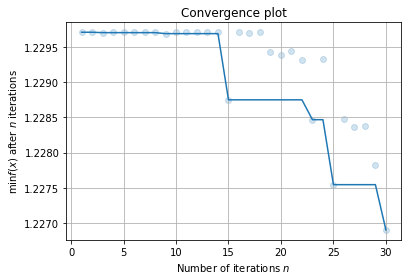

In [10]:
result.plot_convergence()